### Подключение модулей

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, precision_score, recall_score, f1_score, confusion_matrix, r2_score, roc_auc_score, roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [38]:
%matplotlib inline

### Загрузка данных

Загружаю датасет, который уже подоходит для обучения моделей

In [2]:
df = pd.read_csv('bank.csv')
df.head(10)

,Unnamed: 0,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_num
0,0,1,15634602,Hargrave,619,France,1,42,2,0.00,1,1,1,101348.88,1,0
1,1,2,15647311,Hill,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0,1
2,2,3,15619304,Onio,502,France,1,42,8,159660.80,3,1,0,113931.57,1,0
3,3,4,15701354,Boni,699,France,1,39,1,0.00,2,0,0,93826.63,0,0
4,4,5,15737888,Mitchell,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0,1
5,5,6,15574012,Chu,645,Spain,0,44,8,113755.78,2,1,0,149756.71,1,1
6,6,7,15592531,Bartlett,822,France,0,50,7,0.00,2,1,1,10062.80,0,0
7,7,8,15656148,Obinna,376,Germany,1,29,4,115046.74,4,1,0,119346.88,1,2
8,8,9,15792365,He,501,France,0,44,4,142051.07,2,0,1,74940.50,0,0
9,9,10,15592389,H?,684,France,0,27,2,134603.88,1,1,1,71725.73,0,0


Смотрим всё ли правильно загрузилось

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       10000 non-null  int64  
 1   RowNumber        10000 non-null  int64  
 2   CustomerId       10000 non-null  int64  
 3   Surname          10000 non-null  object 
 4   CreditScore      10000 non-null  int64  
 5   Geography        10000 non-null  object 
 6   Gender           10000 non-null  int64  
 7   Age              10000 non-null  int64  
 8   Tenure           10000 non-null  int64  
 9   Balance          10000 non-null  float64
 10  NumOfProducts    10000 non-null  int64  
 11  HasCrCard        10000 non-null  int64  
 12  IsActiveMember   10000 non-null  int64  
 13  EstimatedSalary  10000 non-null  float64
 14  Exited           10000 non-null  int64  
 15  Geography_num    10000 non-null  int64  
dtypes: float64(2), int64(12), object(2)
memory usage: 1.2+ MB


### Преобразование небинарных категориальных признаков в набор фиктивных бинарных

In [4]:
geography_cols = pd.get_dummies(df["Geography"], dtype=int)
geography_cols.head()

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1


### Формирование дата-сета для обучения моделей

In [5]:
features_names = ['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 
                  'IsActiveMember', 'EstimatedSalary']

In [6]:
X = pd.concat([df[features_names], geography_cols], axis = 1)
X.shape

(10000, 12)

In [7]:
y = df['Exited']

### Разделение набора данных

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### KNeighborsClassifier (Классификация ближайших соседей)

In [9]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [10]:
knn_pred_test = knn.predict(X_test)
knn_cm = confusion_matrix(y_test, knn_pred_test)
knn_accuracy = accuracy_score(y_test, knn_pred_test)
knn_error_rate = 1 - knn_accuracy
knn_precision_score = precision_score(y_test, knn_pred_test)
knn_recall = recall_score(y_test, knn_pred_test)
knn_roc_auc_score = roc_auc_score(y_test, knn_pred_test, average='macro')
knn_fpr , knn_tpr, knn_thresholds = roc_curve(y_test, knn_pred_test)

y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

print('train accuracy: ', accuracy_score(y_train, y_train_predict, normalize=True))
print('test accuracy: ', accuracy_score(y_test, y_test_predict, normalize=True))
print(classification_report(y_test, knn_pred_test))

train accuracy:  0.815820895522388
test accuracy:  0.769090909090909
              precision    recall  f1-score   support

           0       0.81      0.93      0.87      2657
           1       0.26      0.10      0.14       643

    accuracy                           0.77      3300
   macro avg       0.53      0.51      0.50      3300
weighted avg       0.70      0.77      0.73      3300



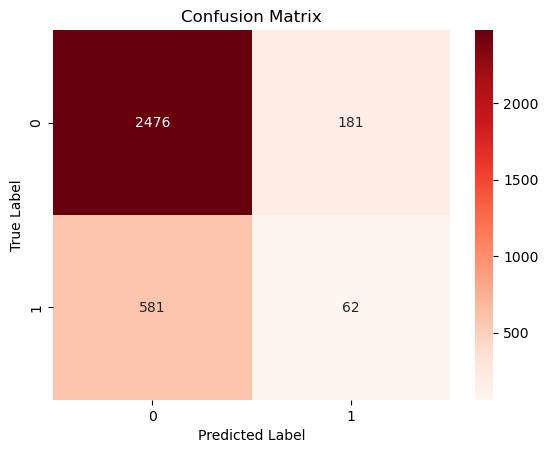

In [11]:
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

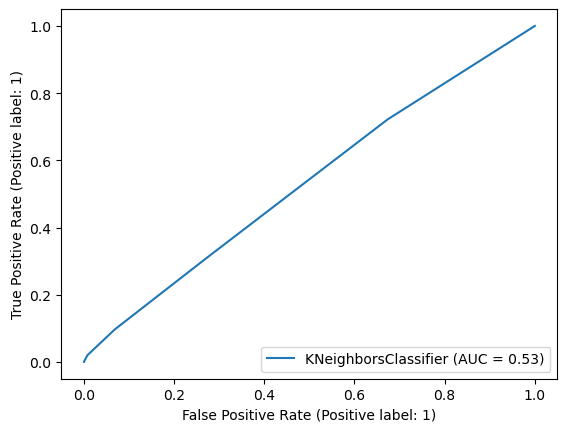

In [12]:
svc_disp = RocCurveDisplay.from_estimator(knn, X_test, y_test)

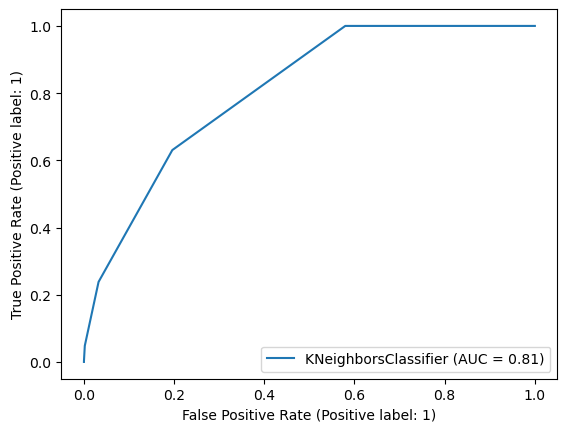

In [13]:
svc_disp = RocCurveDisplay.from_estimator(knn, X_train, y_train)

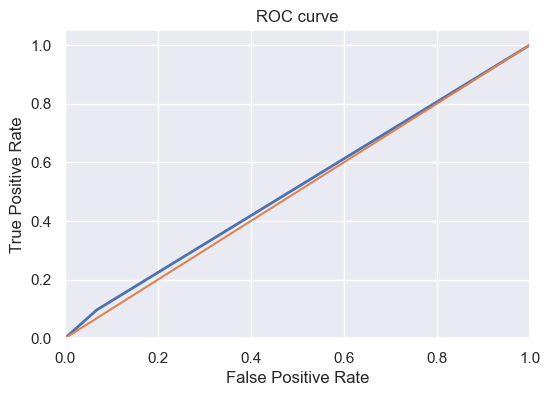

In [14]:
sns.set(font_scale=1)
sns.set_color_codes("muted")

plt.figure(figsize=(6, 4))
fpr, tpr, thresholds = roc_curve(y_test, y_test_predict, pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()

AUC score вышел неплохой

### Gaussian Naive Bayes (НАИВНЫЙ БАЙЕСОВСКИЙ КЛАССИФИКАТОР)

In [15]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [16]:
gnb_pred_test = gnb.predict(X_test)
gnb_cm = confusion_matrix(y_test, gnb_pred_test)
gnb_accuracy = accuracy_score(y_test, gnb_pred_test)
gnb_error_rate = 1 - gnb_accuracy
gnb_precision_score = precision_score(y_test, gnb_pred_test)
gnb_recall = recall_score(y_test, gnb_pred_test)
gnb_roc_auc_score = roc_auc_score(y_test, gnb_pred_test, average='macro')
gnb_fpr , gnb_tpr, gnb_thresholds = roc_curve(y_test, gnb_pred_test)

y_train_predict = gnb.predict(X_train)
y_test_predict = gnb.predict(X_test)

print('train accuracy: ', accuracy_score(y_train, y_train_predict, normalize=True))
print('test accuracy: ', accuracy_score(y_test, y_test_predict, normalize=True))
print(classification_report(y_test, gnb_pred_test))

train accuracy:  0.7829850746268656
test accuracy:  0.7951515151515152
              precision    recall  f1-score   support

           0       0.81      0.97      0.88      2657
           1       0.38      0.08      0.14       643

    accuracy                           0.80      3300
   macro avg       0.60      0.53      0.51      3300
weighted avg       0.73      0.80      0.74      3300



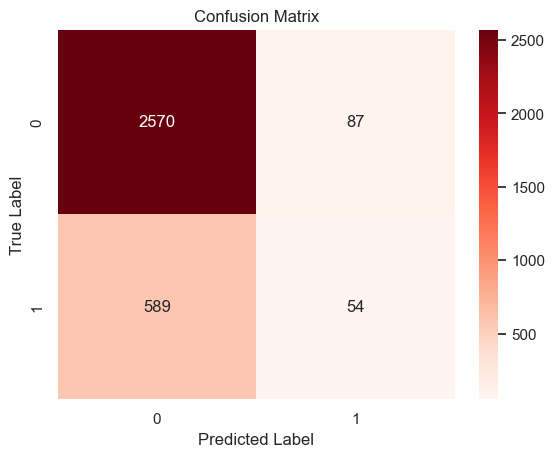

In [17]:
sns.heatmap(gnb_cm, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

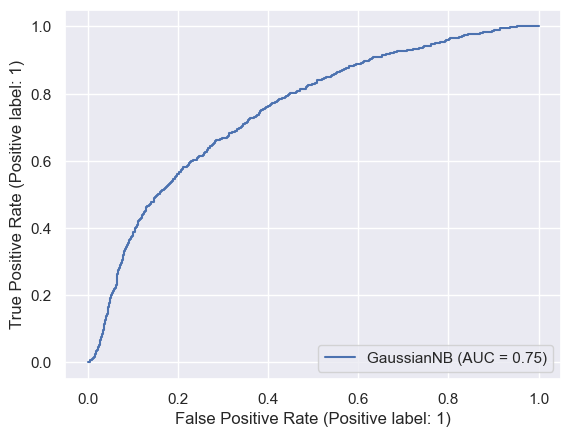

In [18]:
svc_disp = RocCurveDisplay.from_estimator(gnb, X_test, y_test)

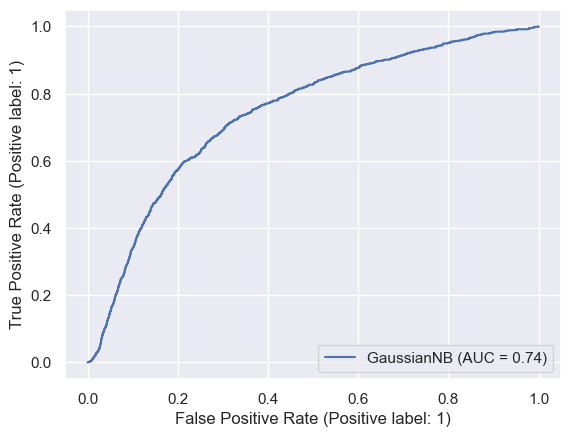

In [19]:
svc_disp = RocCurveDisplay.from_estimator(gnb, X_train, y_train)

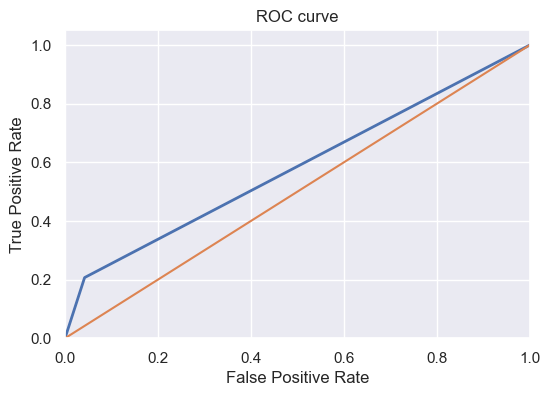

In [37]:
sns.set(font_scale=1)
sns.set_color_codes("muted")

plt.figure(figsize=(6, 4))
fpr, tpr, thresholds = roc_curve(y_test, y_test_predict, pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()

Результат чуть хуже чем у KNN

### Random Forest Classifier (Классификатор дерева решений)

In [20]:
rfc  = RandomForestClassifier(criterion = 'gini',
                                    n_estimators = 100,
                                    max_depth = 9,
                                    random_state = 42,
                                    n_jobs = -1)

rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=9, n_jobs=-1, random_state=42)

In [21]:
rfc_pred_test = rfc.predict(X_test)
rfc_cm = confusion_matrix(y_test, rfc_pred_test)
rfc_accuracy = accuracy_score(y_test, rfc_pred_test)
rfc_error_rate = 1 - rfc_accuracy
rfc_precision_score = precision_score(y_test, rfc_pred_test)
rfc_recall = recall_score(y_test, rfc_pred_test)
rfc_roc_auc_score = roc_auc_score(y_test, rfc_pred_test, average='macro')
rfc_fpr , rfc_tpr, rfc_thresholds = roc_curve(y_test, rfc_pred_test)

y_train_predict = rfc.predict(X_train)
y_test_predict = rfc.predict(X_test)

print('train accuracy: ', accuracy_score(y_train, y_train_predict, normalize=True))
print('test accuracy: ', accuracy_score(y_test, y_test_predict, normalize=True))
print(classification_report(y_test, rfc_pred_test))

train accuracy:  0.8916417910447761
test accuracy:  0.8712121212121212
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2657
           1       0.80      0.45      0.58       643

    accuracy                           0.87      3300
   macro avg       0.84      0.71      0.75      3300
weighted avg       0.86      0.87      0.86      3300



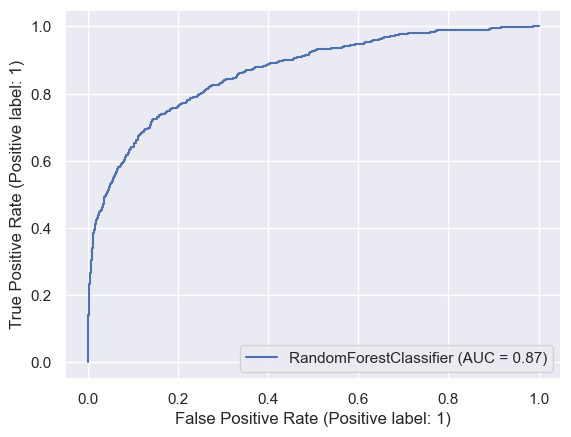

In [23]:
svc_disp = RocCurveDisplay.from_estimator(rfc, X_test, y_test)

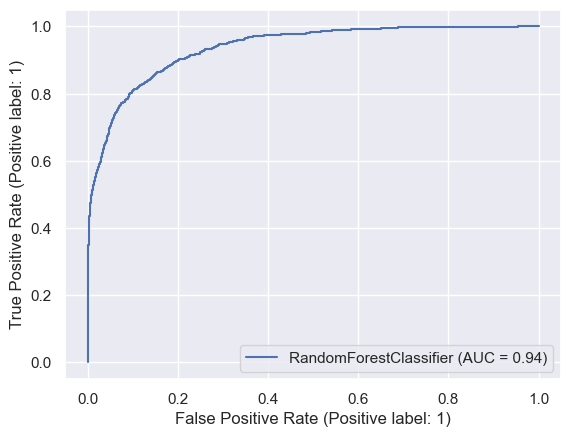

In [24]:
svc_disp = RocCurveDisplay.from_estimator(rfc, X_train, y_train)

### Logistic Regression (Логистическая регрессия)

In [25]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [26]:
lr = LogisticRegression(random_state = 42)
lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [27]:
lr_pred_test = lr.predict(X_test)
lr_cm = confusion_matrix(y_test, lr_pred_test)
lr_accuracy = accuracy_score(y_test, lr_pred_test)
lr_error_rate = 1 - lr_accuracy
lr_precision_score = precision_score(y_test, lr_pred_test)
lr_recall = recall_score(y_test, lr_pred_test)
lr_roc_auc_score = roc_auc_score(y_test, lr_pred_test, average='macro')
lr_fpr , knn_tpr, lr_thresholds = roc_curve(y_test, lr_pred_test)

y_train_predict = lr.predict(X_train)
y_test_predict = lr.predict(X_test)

print('train accuracy: ', accuracy_score(y_train, y_train_predict, normalize=True))
print('test accuracy: ', accuracy_score(y_test, y_test_predict, normalize=True))
print(classification_report(y_test, lr_pred_test))

train accuracy:  0.8097014925373134
test accuracy:  0.8115151515151515
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      2657
           1       0.54      0.21      0.30       643

    accuracy                           0.81      3300
   macro avg       0.69      0.58      0.60      3300
weighted avg       0.78      0.81      0.78      3300



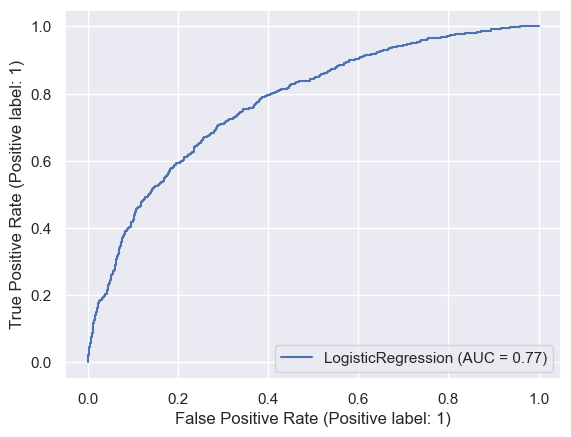

In [29]:
svc_disp = RocCurveDisplay.from_estimator(lr, X_test, y_test)

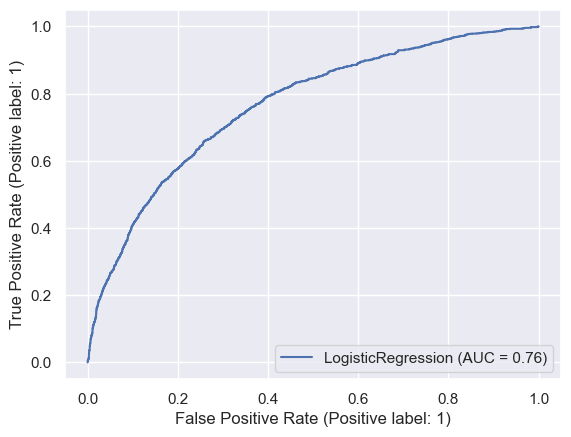

In [30]:
svc_disp = RocCurveDisplay.from_estimator(lr, X_train, y_train)

### Сравнение

In [31]:
classifiers =["KNeighborsClassifier", "Gaussian Naive Bayes", "Random Forest Classifier", "Logistic Regression"]

log_cols = ["Classifier", "Accuracy", "Error Rate", "Precision", "Recall", "AUC Score"]
log = pd.DataFrame(columns=log_cols)

log["Classifier"] = classifiers
log["Accuracy"] = [knn_accuracy, gnb_accuracy, rfc_accuracy, lr_accuracy]
log["Error Rate"] = [knn_error_rate, gnb_error_rate, rfc_error_rate, lr_error_rate]
log["Precision"] = [knn_precision_score, gnb_precision_score, rfc_precision_score, lr_precision_score,]
log["Recall"] = [knn_recall, gnb_recall, rfc_recall, lr_recall]
log["AUC Score"] = [knn_roc_auc_score, gnb_roc_auc_score, rfc_roc_auc_score, lr_roc_auc_score]

log

,Classifier,Accuracy,Error Rate,Precision,Recall,AUC Score
0,KNeighborsClassifier,0.769091,0.230909,0.255144,0.096423,0.514151
1,Gaussian Naive Bayes,0.795152,0.204848,0.382979,0.083981,0.525619
2,Random Forest Classifier,0.871212,0.128788,0.804469,0.447900,0.710777
3,Logistic Regression,0.811515,0.188485,0.542857,0.206843,0.582345


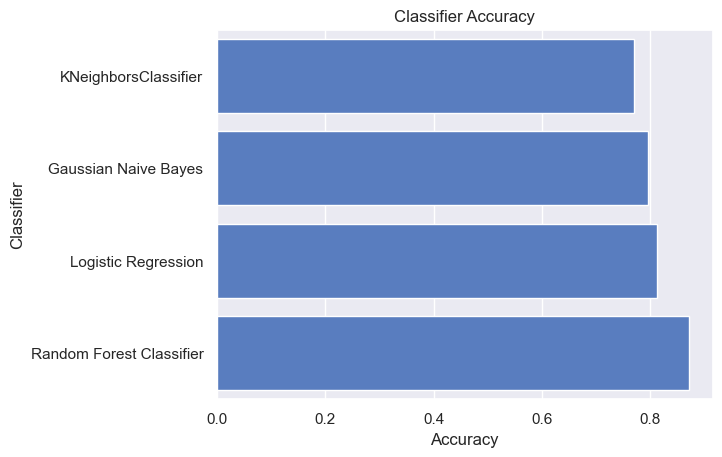

In [32]:
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log.sort_values(by='Accuracy'), color="b");

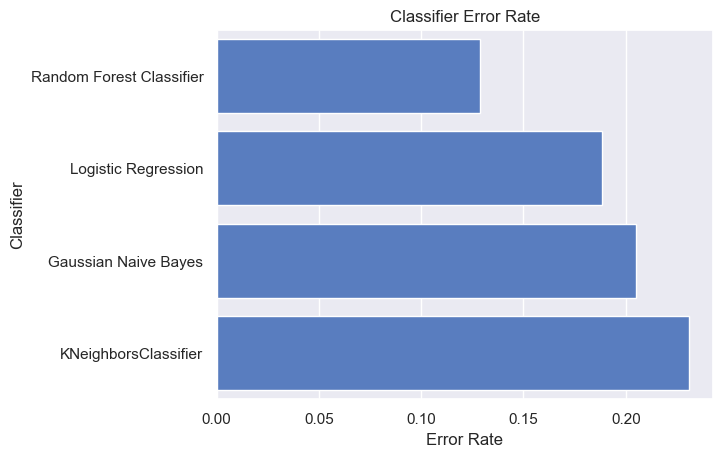

In [33]:
plt.xlabel('Error Rate')
plt.title('Classifier Error Rate')

sns.set_color_codes("muted")
sns.barplot(x='Error Rate', y='Classifier', data=log.sort_values(by='Error Rate'), color="b");

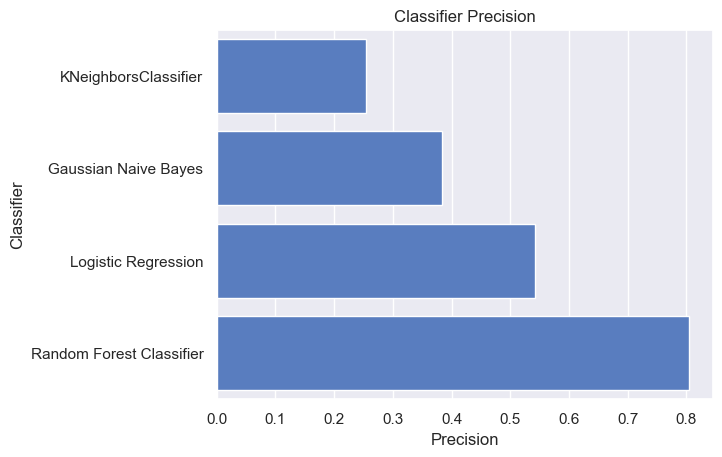

In [34]:
plt.xlabel('Precision')
plt.title('Classifier Precision')

sns.set_color_codes("muted")
sns.barplot(x='Precision', y='Classifier', data=log.sort_values(by='Precision'), color="b");

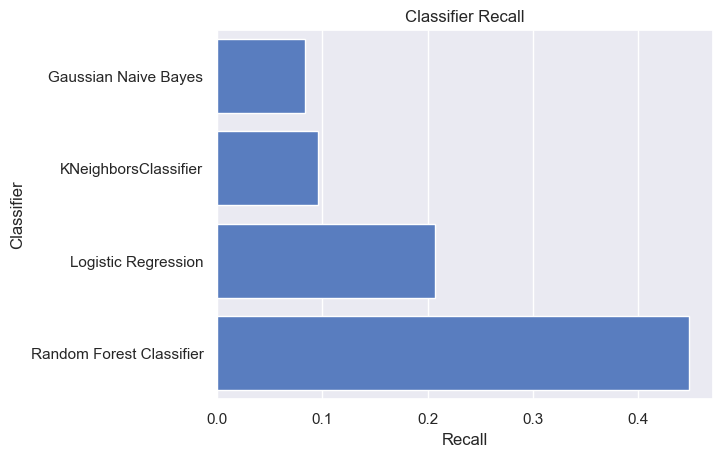

In [35]:

plt.xlabel('Recall')
plt.title('Classifier Recall')

sns.set_color_codes("muted")
sns.barplot(x='Recall', y='Classifier', data=log.sort_values(by='Recall'), color="b");

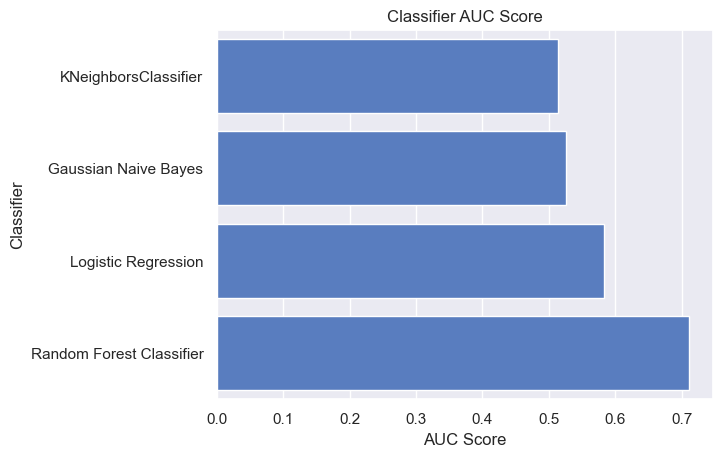

In [36]:

plt.xlabel('AUC Score')
plt.title('Classifier AUC Score')

sns.set_color_codes("muted")
sns.barplot(x='AUC Score', y='Classifier', data=log.sort_values(by='AUC Score'), color="b");